# Benchmark Figures on Selected Tasks

## Setup

In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Define color palette
sns.set_theme(
    color_codes=True, palette="bright", style="ticks", context="talk", font_scale=1.5
)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    inputs = open(filename, "r")
    lines = inputs.readlines()
    ls = []
    for line in lines:
        ls.append(ast.literal_eval(line))
    return ls


def plot_acc(col, ls, pos, n_train, lw=5, quantile=True, ht_mod=False):
    if pos == 0:
        for i, l in enumerate(ls[pos]):
            col.plot(
                n_train,
                np.mean(l, axis=0),
                label=legends[i],
                lw=lw,
                color=colors[i],
                linestyle=styles[i],
            )
            if quantile:
                qunatiles = np.nanquantile(l, [0.25, 0.75], axis=0)
                col.fill_between(
                    n_train,
                    qunatiles[0],
                    qunatiles[1],
                    lw=1,
                    facecolor=colors[i],
                    linestyle=styles[i],
                    alpha=0.3,
                )
    else:
        for i, l in enumerate(ls[pos]):
            if ht_mod and i == 3:
                if pos == 1:
                    n_train_mod = range(100, 4100, 100)
                    l = np.array(l)[:, :40]
                elif pos == 2:
                    n_train_mod = range(100, 35100, 100)
                    l = np.array(l)[:, :350]
            else:
                n_train_mod = n_train

            col.plot(
                n_train_mod,
                np.mean(l, axis=0),
                lw=lw,
                color=colors[i],
                linestyle=styles[i],
            )
            if quantile:
                qunatiles = np.nanquantile(l, [0.25, 0.75], axis=0)
                col.fill_between(
                    n_train_mod,
                    qunatiles[0],
                    qunatiles[1],
                    lw=1,
                    facecolor=colors[i],
                    linestyle=styles[i],
                    alpha=0.3,
                )

            if ht_mod and i == 3:
                if pos == 1:
                    col.plot(
                        4000,
                        np.mean(l, axis=0)[-1],
                        label="Invalid",
                        marker="X",
                        markersize=20,
                        color="black",
                    )
                elif pos == 2:
                    col.plot(
                        35000,
                        np.mean(l, axis=0)[-1],
                        marker="X",
                        markersize=20,
                        color="black",
                    )

In [4]:
directory = "../benchmarks/results/"
datasets = ["splice", "pendigits", "cifar10"]
xtitles = [
    "Splice (2300,60,3)",
    "Pendigits (7400,16,10)",
    "CIFAR-10 (50000,3072,10)",
]
ranges = [23, 74, 500]

## Accuracy Plot

In [5]:
prefixes = ["sdf/", "sdt/", "ht/", "mf/"]
legends = ["SDF-100T", "SDF-10T", "SDT", "HT", "MF-10T"]
colors = ["r", "r", "r", "g", "y"]
styles = ["-", "-.", "--", "--", "-."]

In [6]:
acc_ls = []
for i, dataset in enumerate(datasets):
    acc_l = []

    for prefix in prefixes:
        if prefix == "sdf/":
            acc = load_result(directory + prefix + dataset + "_acc.txt")[:10]
            acc_l.append(acc)
            acc = load_result(directory + prefix + dataset + "_acc.txt")[10:]
        else:
            acc = load_result(directory + prefix + dataset + "_acc.txt")[:10]
        acc_l.append(acc)

    acc_ls.append(acc_l)

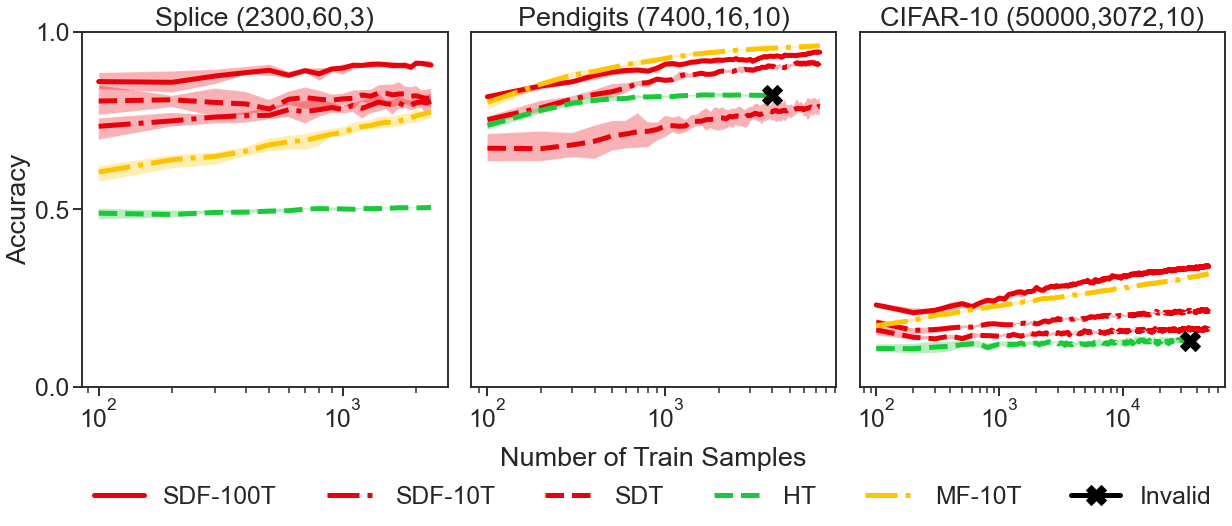

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 6), constrained_layout=True)

fig.text(0.53, -0.07, "Number of Train Samples", ha="center")
ytitles = ["Accuracy", "Virtual Memory (GB)"]
ylimits = [[0, 1], [0, 56]]
yticks = [[0, 0.5, 1], [0, 56]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[0])

    n_train = range(100, (ranges[i] + 1) * 100, 100)

    # Label x axis and plot figures
    col.set_title(xtitles[i])
    plot_acc(col, acc_ls, i, n_train, ht_mod=True)

    # Label y axis
    if i % 3 == 0:
        col.set_yticks(yticks[0])
        col.set_ylabel(ytitles[i])
    else:
        col.set_yticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.22),
    bbox_transform=plt.gcf().transFigure,
    ncol=6,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/select_acc_stream.pdf", transparent=True, bbox_inches="tight")

## Accuracy Plot for Batch Classifiers

In [8]:
prefixes = ["sdf/", "sdt/", "rf/", "dt/"]
legends = ["SDF-100T", "SDF-10T", "SDT", "DF-100T", "DF-10T", "DT"]
colors = ["r", "r", "r", "b", "b", "b"]
styles = ["-", "-.", "--", "-", "-.", "--"]

In [9]:
acc_ls = []
for i, dataset in enumerate(datasets):
    acc_l = []

    for prefix in prefixes:
        if prefix == "sdf/" or prefix == "rf/":
            acc = load_result(directory + prefix + dataset + "_acc.txt")[:10]
            acc_l.append(acc)
            acc = load_result(directory + prefix + dataset + "_acc.txt")[10:]
        else:
            acc = load_result(directory + prefix + dataset + "_acc.txt")[:10]
        acc_l.append(acc)

    acc_ls.append(acc_l)

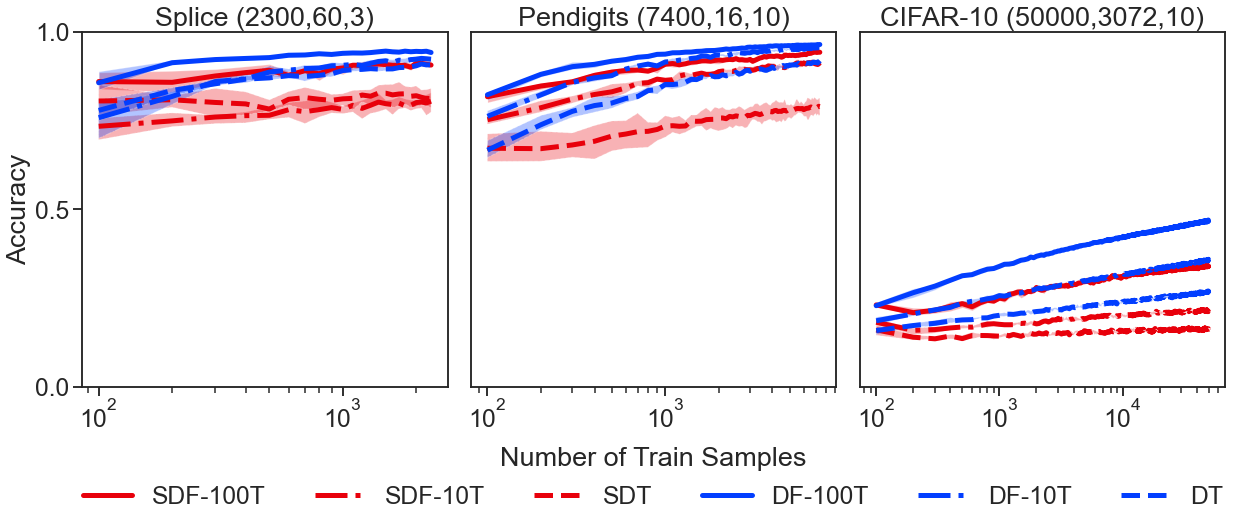

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 6), constrained_layout=True)

fig.text(0.53, -0.07, "Number of Train Samples", ha="center")
ytitles = ["Accuracy"]
ylimits = [[0, 1]]
yticks = [[0, 0.5, 1]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[0])

    n_train = range(100, (ranges[i] + 1) * 100, 100)

    # Label x axis and plot figures
    col.set_title(xtitles[i])
    plot_acc(col, acc_ls, i, n_train)

    # Label y axis
    if i % 3 == 0:
        col.set_yticks(yticks[0])
        col.set_ylabel(ytitles[i])
    else:
        col.set_yticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.22),
    bbox_transform=plt.gcf().transFigure,
    ncol=6,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/select_acc_batch.pdf", transparent=True, bbox_inches="tight")

## Time Plot

In [11]:
prefixes = ["sdf/", "rf/", "sdt/", "dt/", "ht/", "mf/"]
legends = ["SDF-10T", "DF-10T", "SDT", "DT", "HT", "MF-10T"]
colors = ["r", "b", "r", "b", "g", "y"]
styles = ["-.", "-.", "--", "--", "--", "-."]

In [12]:
# Show concatenated mem for batch estimators
concat = True

time_ls = []
for i, dataset in enumerate(datasets):
    time_l = []

    for prefix in prefixes:
        if prefix == "sdf/" or prefix == "rf/":
            time = load_result(directory + prefix + dataset + "_train_t.txt")[10:]
        else:
            time = load_result(directory + prefix + dataset + "_train_t.txt")[:10]
        if concat and (prefix == "dt/" or prefix == "rf/"):
            for t in time:
                for j in range(1, ranges[i]):
                    t[j] += t[j - 1]

        time_l.append(time)

    time_ls.append(time_l)

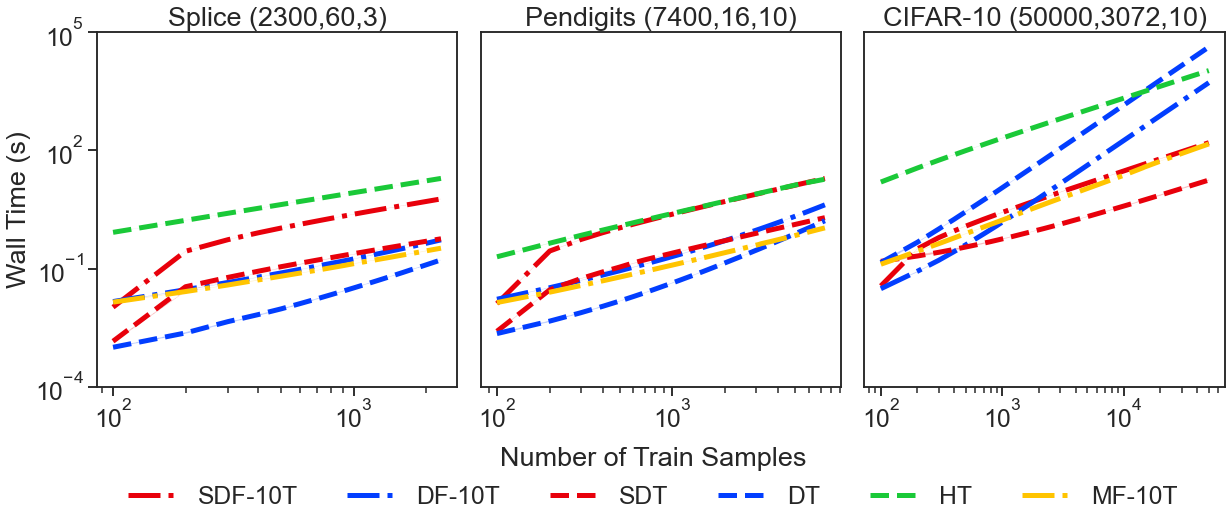

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 6), constrained_layout=True)

fig.text(0.53, -0.07, "Number of Train Samples", ha="center")
ytitles = ["Wall Time (s)"]
ylimits = [[1e-4, 1e5]]
yticks = [[1e-4, 1e-1, 1e2, 1e5]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_yscale("log")
    col.set_ylim(ylimits[0])

    n_train = range(100, (ranges[i] + 1) * 100, 100)

    # Label x axis and plot figures
    col.set_title(xtitles[i])
    plot_acc(col, time_ls, i, n_train)

    # Label y axis
    if i % 3 == 0:
        col.set_yticks(yticks[0])
        col.set_ylabel(ytitles[i])
    else:
        col.set_yticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.22),
    bbox_transform=plt.gcf().transFigure,
    ncol=6,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/select_time.pdf", transparent=True, bbox_inches="tight")

## Memory Plot

In [14]:
# Reorder plots
prefixes = ["sdf/", "sdt/", "ht/", "mf/"]
legends = ["SDF-10T", "SDT", "HT", "MF-10T"]
colors = ["r", "r", "g", "y"]
styles = ["-.", "--", "--", "-."]

# Load CIFAR-10 memory records
cifar_mem_l = []
for prefix in prefixes:
    cifar_mem = (
        np.mean(load_result(directory + prefix + "cifar10_v_m_first.txt")[:10], axis=0)
        * 1024
        * 1024
        * 1024
        / 1000
        / 1000
        / 1000
    )
    cifar_mem_l.append([cifar_mem])

# Load CIFAR-10 node records
cifar_node_l = []
for prefix in prefixes:
    cifar_node = np.mean(
        load_result(directory + prefix + "cifar10_n_node.txt")[:10], axis=0
    )
    cifar_node_l.append([cifar_node])

# Load CIFAR-10 node records
cifar_size_l = []
for prefix in prefixes:
    cifar_size = (
        np.mean(load_result(directory + prefix + "cifar10_size_first.txt")[:10], axis=0)
        / 1000
        / 1000
        / 1000
    )
    cifar_size_l.append([cifar_size])

cifar_l = [cifar_size_l] + [cifar_node_l] + [cifar_mem_l]

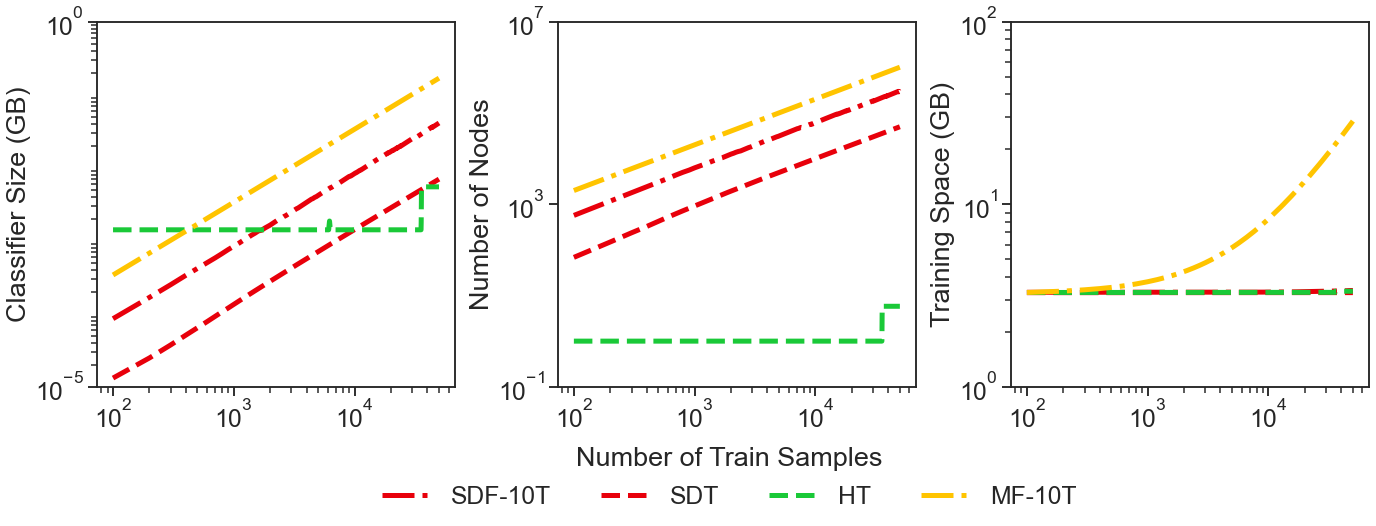

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(19, 6), constrained_layout=True)
plt.margins()
fig.text(0.53, -0.07, "Number of Train Samples", ha="center")
ytitle = ["Classifier Size (GB)", "Number of Nodes", "Training Space (GB)"]
ylimit = [[1e-5, 1e0], [1e-1, 1e7], [1e0, 1e2]]
ytick = [[1e-5, 1e0], [1e-1, 1e3, 1e7], [1e0, 1e1, 1e2]]
n_train = range(100, (ranges[2] + 1) * 100, 100)

for i, col in enumerate(ax):
    col.set_xscale("log")

    # Make y axis log scale
    col.set_yscale("log")

    # Label x axis and plot figures
    plot_acc(col, cifar_l, i, n_train, quantile=False)

    # Label y axis
    col.set_ylim(ylimit[i])
    col.set_yticks(ytick[i])
    col.set_ylabel(ytitle[i])

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.22),
    bbox_transform=plt.gcf().transFigure,
    ncol=6,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)

plt.savefig(
    "../paper/select_cifar_mem_stream.pdf", transparent=True, bbox_inches="tight"
)